# **Trouver des recettes pour vider son réfrigérateur en prenant soin de sa santé**

## Projet python ENSAE - 2e année
Ce projet a été réalisé par Claire BRESSON, Emile CASSANT et Lila MEKKI dans le cadre du cours de programmation de Lino Galiana. 

# Présentation du projet
Ayant constaté que, même quand son réfrigérateur n'est pas vide, on ne sait pas toujours quoi cuisiner, nous avons décidé de mener notre projet sur cette thématique. L'objectif est donc de générer des recettes, à partir du site marmiton, en fonction des aliments disponibles et de donner les apports nutritifs associés à ces recettes. Cela permettra aux utilisateurs de varier plus facilement leur alimentation. Nous espérons ainsi promouvoir un équilibre alimentaire et réduire le nombre de problèmes (notamment de santé) liés à l'alimentation.\
Comment peut-on donc générer, à partir d'un ou plusieurs ingrédient(s), des recettes promeuvant l'équilibre alimentaire et participant ainsi à l'implémentation d'une meilleure santé globale ?\
Notre projet s'articule en quatre étapes principales :
1. Nous avons d'abord réalisé l'analyse descriptive d'une base de données qui nous a permis de mettre en évidence les habitudes de consommation et les modes de vie des ménages. Cela nous a permis de mieux comprendre les problèmes de santé auxquels fait face la société et donc de mettre en évidence l'intérêt de notre projet dans ce cadre : quelles sont les réponses que peut apporter l'alimentation aux problématiques auxquelles est confrontée la société ?
2. Nous avons ensuite nettoyé une seconde base de données, qui présente les apports nutritifs des aliments courants.
3. Après cela, nous avons scrapé le site de marmiton afin de pouvoir, pour un ou plusieurs ingrédient(s) donné(s), récupérer des recettes.
4. Enfin, nous avons, pour une recette donnée, codé un modèle permettant de calculer les apports nutritifs apportés. L'objectif de cette étape est de permettre aux utilisateurs de varier leur alimentation pour qu'elle présente le moins de carences possibles.

# **ANALYSE DESCRIPTIVE DES HABITUDES DE CONSOMMATION**

**Motivation du projet**

Dans une société de plus en plus sédentaire, où l'inactivité physique devient une réalité préoccupante, la nécessité de promouvoir des habitudes alimentaires saines est plus cruciale que jamais. En France, un nombre croissant de personnes adoptent des modes de vie sédentaires, ce qui entraîne une augmentation alarmante de maladies liées à une mauvaise hygiène de vie. Face à cette préoccupation grandissante, la création et l'adoption de recettes alimentaires saines deviennent un acte significatif pour préserver notre bien-être global.

En encourageant la création et le partage de recettes alimentaires saines, nous pouvons inspirer un changement collectif vers des modes de vie plus équilibrés. 
    
Site que nous avons utilisé pour effectuer notre analyse descriptive : https://www.data.gouv.fr/fr/datasets/donnees-de-consommations-et-habitudes-alimentaires-de-letude-inca-3/

In [11]:
!pip install inflect

In [62]:
# Importations 
import pandas as pd 
import matplotlib.pyplot as plt
from functions import *
import warnings
from conversions_unites import *
# Nous ignorons les warnings qui ne sont pas des warnings important
warnings.filterwarnings("ignore")

# **1. Activité physique et sédentarité**

Cette table contient les données des questionnaires auto-administrés (pour les adultes 18-79 ans) et face-à-face (pour les enfants 3-17 ans) relatifs au volet
« Sédentarité, activité physique et loisirs ». Il n’y a pas de données relatives à cette thématique pour les enfants de 0-35 mois.
Elle regroupe les informations suivantes : mode de transport du trajet domicile-travail, temps passé devant les écrans (télévision, jeux vidéo, ordinateur) pendant la
semaine et le week-end, pratique et fréquence d’une activité physique (y compris dans le cadre scolaire), type d’activité physique pratiquée, niveau d’activité physique,
niveau de sédentarité et profils d’activité physique. 

## 1.1. Statistiques générales

In [8]:
activ_sedentaire = pd.read_csv("https://static.data.gouv.fr/resources/donnees-de-consommations-et-habitudes-alimentaires-de-letude-inca-3/20200117-101839/actphys-sedent.csv",sep=";") 
print(activ_sedentaire.shape)
data_pop1 = activ_sedentaire[activ_sedentaire['POPULATION'] == "Pop1 Individu"]
data_pop2 = activ_sedentaire[activ_sedentaire['POPULATION'] == "Pop2 Individu"]
activ_sedentaire.head()

(4725, 93)


,POPULATION,NOIND,transport_personnel,transport_ecole,tv_score,tv_duree,jvideo_score,jvideo_duree,ordi_score,ordi_duree,...,activite_domloissport_duree,activite_domloissport_score,activite_moderee_score,activite_intense_score,activite_total_duree,activite_total_score,nap,profil_activite,sedentarite,sedentarite_duree
0,Pop1 Individu,120100401,NaN,1.0,NaN,1.642857,NaN,0.000000,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0.0,NaN
1,Pop1 Individu,120100501,NaN,1.0,NaN,0.821429,NaN,0.964286,NaN,0.571429,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,0.0,NaN
2,Pop1 Individu,120100601,NaN,3.0,NaN,1.142857,NaN,0.000000,NaN,0.571429,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0.0,NaN
3,Pop1 Individu,120100801,NaN,1.0,NaN,1.000000,NaN,0.357143,NaN,0.357143,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0.0,NaN
4,Pop1 Individu,120100901,NaN,2.0,NaN,2.571429,NaN,1.000000,NaN,0.285714,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,NaN


In [9]:
# Pop1 Individu pour les enfants de 3-17 ans et Pop2 Individu pour les adultes de 18-79 ans.
activ_sedentaire['POPULATION'].value_counts()

POPULATION
Pop1 Individu    2437
Pop2 Individu    2288
Name: count, dtype: int64

La population semble donc également répartie parmi les interrogés entre les jeunes (jusqu'à 17 ans) et les adultes (18 ans et plus).

## 1.2. Modes de transport

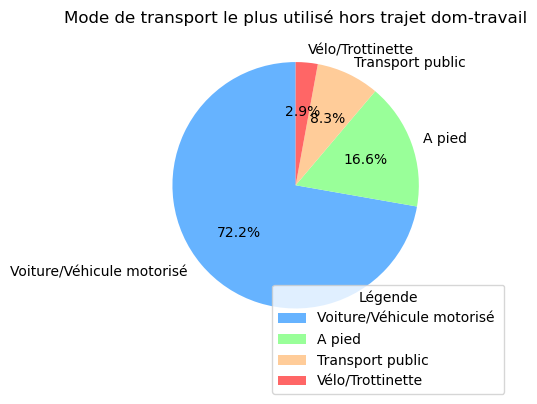

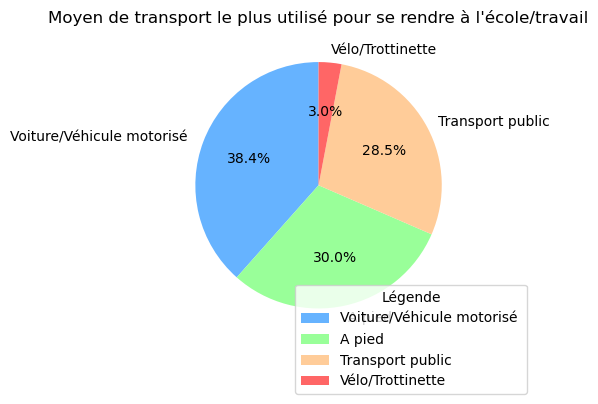

In [10]:
for i, transport in enumerate(['transport_personnel', 'transport_ecole']):
    if i==0:
        leg = 'Mode de transport le plus utilisé hors trajet dom-travail'
        transport_pie(activ_sedentaire, transport, leg)
    else:  
        leg = "Moyen de transport le plus utilisé pour se rendre à l'école/travail"
        transport_pie(activ_sedentaire, transport, leg) 

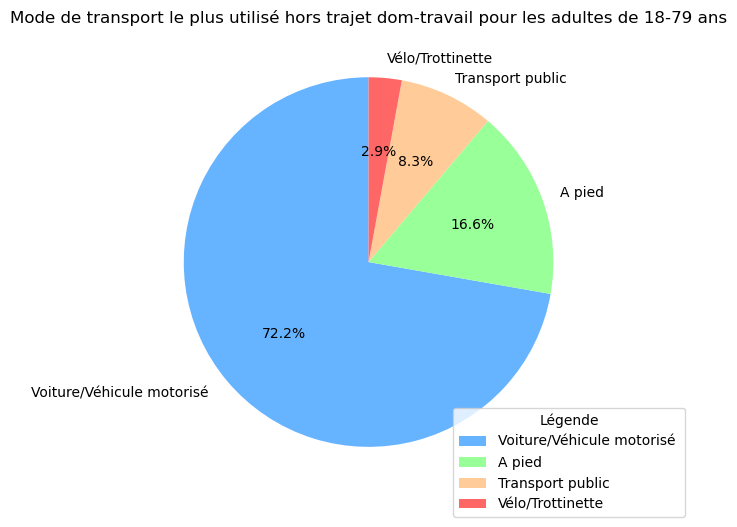

In [200]:
leg = "Mode de transport le plus utilisé hors trajet dom-travail pour les adultes de 18-79 ans"
transport_pie(data_pop2, "transport_personnel", leg) 

Ces données montrent bien les tendances de mode de vie actuel, dans lequel, nous réalisons au moins un tiers de nos trajets quotidiens en voiture ou véhicule motorisé. Les déplacements à pied représentent entre 16 et 30% des trajets quotidiens. Cela montre la sédentarité de la population.  

## 1.3. Temps passé devant les écrans

In [12]:
for col in ["tv_duree", "jvideo_duree", "ordi_duree"]:
    print("Durée moyenne passée devant la/les/l'", col.split('_')[0] ,activ_sedentaire[col].mean(), "(en heures)")

Durée moyenne passée devant la/les/l' tv 2.394437140370197 (en heures)
Durée moyenne passée devant la/les/l' jvideo 0.3580938964180044 (en heures)
Durée moyenne passée devant la/les/l' ordi 1.2549624108854236 (en heures)


In [13]:
for col in ["tv_duree", "jvideo_duree", "ordi_duree"]:
    print("Durée moyenne passée devant la/les/l'", col.split('_')[0] ,data_pop2[col].mean(), "(en heures) pour les adultes")

Durée moyenne passée devant la/les/l' tv 3.146712771583524 (en heures) pour les adultes
Durée moyenne passée devant la/les/l' jvideo 0.13780983906837999 (en heures) pour les adultes
Durée moyenne passée devant la/les/l' ordi 1.6015715929230416 (en heures) pour les adultes


Le temps moyen passé devant les écrans est donc de presque 5h par jour chez les adultes. Ce qui peut jouer sur les besoins nutritionnels qui sont moins importants si la personne ne pratique pas d'activité physique particulière.

## 1.4. Niveau d'activité physique

In [15]:
for col in ["eps_nbjours", "club_nbjours", "activite_musculation_nbjours", 'activite_moderee_nbjours', 'activite_intense_nbjours']:
    print("Nombre de jours à pratiquer ", col.split('nb')[0] , ":", activ_sedentaire[col].mean().round(2),'jours')

Nombre de jours à pratiquer  eps_ : 1.41 jours
Nombre de jours à pratiquer  club_ : 1.03 jours
Nombre de jours à pratiquer  activite_musculation_ : 1.04 jours
Nombre de jours à pratiquer  activite_moderee_ : 2.33 jours
Nombre de jours à pratiquer  activite_intense_ : 1.81 jours


Les recommandations de l'OMS sont les suivantes : 
- Au moins 150 minutes d'activité physique modérée par semaine (marche, vélo, jardinage)
- Au moins 75 minutes d'activité physique intense par semaine (course à pied, natation rapide)
- Au moins deux séances de renforcement musculaire par semaine (exercices de musculation, yoga)

Ici les données sont chiffrées en jours mais hormis les activités de musculation, les quantités d'activité physique pratiquées semblent être conformes aux recommandations de l'OMS en considérant qu'un jour d'activité correspond à environ une heure. 

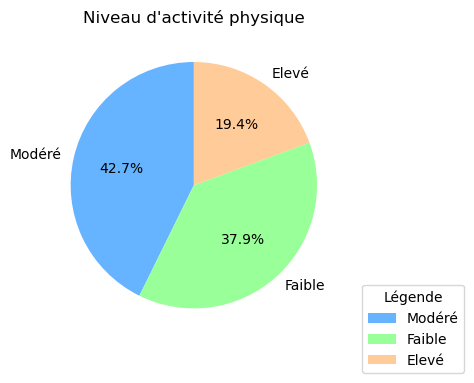

In [16]:
mapping_labels = {1: 'Faible', 2: 'Modéré', 3: 'Elevé'}
activ_sedentaire["nap"] = activ_sedentaire["nap"].map(mapping_labels)
count_by_format = activ_sedentaire["nap"].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(count_by_format, labels=count_by_format.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title("Niveau d'activité physique")
plt.legend(title = "Légende", loc='upper right', bbox_to_anchor=(1.4, 0.2)) 
plt.show()

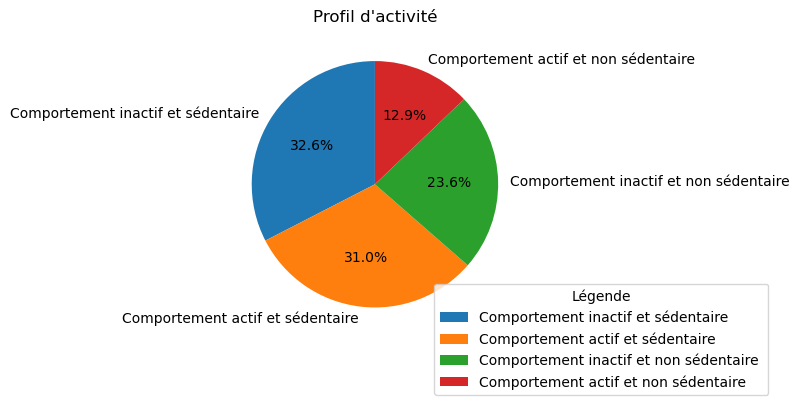

In [205]:
col = "profil_activite"
mapping_labels = {1: 'Comportement inactif et sédentaire', 2: 'Comportement inactif et non sédentaire ', 3: 'Comportement actif et sédentaire',
                  4: 'Comportement actif et non sédentaire'}
activ_sedentaire[col] = activ_sedentaire[col].map(mapping_labels)
count_by_format = activ_sedentaire[col].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(count_by_format, labels=count_by_format.index, autopct='%1.1f%%', startangle=90)
plt.title("Profil d'activité")
plt.legend(title = "Légende", loc='upper right', bbox_to_anchor=(1.8, 0.2)) 
plt.show()

Ces statistiques sont utiles afin de prendre en compte le niveau moyen d'activité de la population. 

Par exemple, nous voyons ici les proportions moyennes de la population pour chaque niveau d'activité. Or, on peut estimer à l'aide du métabolisme de base et de facteurs d'activité, le besoin calorique journalier d'un individu selon son niveau d'activité. 

- Sédentaire (peu ou pas d'exercice) :

    Besoin calorique = Métabolisme de base x 1.2

- Léger (exercice léger/sport 1-3 jours par semaine) :

    Besoin calorique = Métabolisme de base x 1.375

- Modéré (exercice modéré/sport 3-5 jours par semaine) :

    Besoin calorique = Métabolisme de base x 1.55

- Actif (exercice intense/sport 6-7 jours par semaine) :

    Besoin calorique = Métabolisme de base x 1.725

Nous pourrions donc associer par la suite, les besoins caloriques d'une personne selon son niveau d'activité. 

Ces perspectives n'ont pas été traitées dans le sujet faute de temps, mais nous pourrions imaginer développer une semaine de recettes selon un programme d'activité et donc un besoin calorique fixé par la personne.

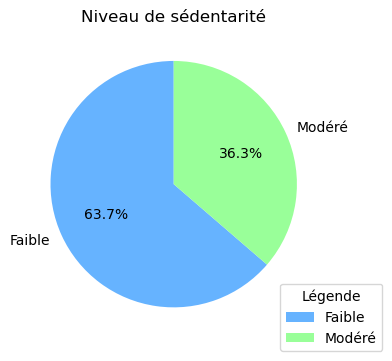

In [206]:
col = "sedentarite"
mapping_labels = {1: 'Faible', 2: 'Modéré', 3: 'Elevé'}
activ_sedentaire[col] = activ_sedentaire[col].map(mapping_labels)
count_by_format = activ_sedentaire[col].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(count_by_format, labels=count_by_format.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title("Niveau de sédentarité")
plt.legend(title = "Légende", loc='upper right', bbox_to_anchor=(1.2, 0.2)) 
plt.show()

# **2. Habitudes alimentaires**

Table HABITUDES_INDIV

Elle regroupe les informations suivantes : lieux et occasions de consommation, consommations hors-foyer et entre les repas, préférences alimentaires, présence de
sel/beurre/sauce sur la table au moment des repas, lecture des étiquettes, sources d’informations en alimentation, consommation de denrées animales crues et des
croûtes de fromage, préparation des fruits et légumes crus, spécificités de l’alimentation des enfants de 0 à 35 mois (ex : allaitement (exclusif ou partiel), type de laits
consommés, diversification alimentaire, matériaux des biberons et des tétines, préparation, stockage et conservation des biberons de lait, mode de chauffage des
laits et contenants utilisés), autoconsommation et utilisation de produits phytosanitaires au potager, consommation d’aliments issus de l’agriculture biologique et
cuisson des aliments au barbecue. 

## 2.1. Statistiques générales

In [17]:
habitudes_ali = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/099351b9-e32e-4e38-8f23-dec21fd07c71', sep = ';')
print(habitudes_ali.shape)
habitudes_ali.sample(5)

(4372, 389)


,POPULATION,NOIND,periode_reference,repasenfantmidi_vous,repasenfantmidi_am,repasenfantmidi_creche,repasenfantmidi_parent,repasenfantmidi_autre,repasenfantmidi_autre_libelle,repasenfant_freq,...,conso_legumes_secs_bio_tjr_svt,conso_cereales_bio_tjr_svt,conso_pain_bio_tjr_svt,conso_autres_alim_bio_tjr_svt,conso_barbecue,conso_barbecue_elec,conso_barbecue_bois,conso_barbecue_gaz,conso_barbecue_printps_ete_freq,conso_barbecue_automn_hiver_freq
4296,Pop2 Individu,529405101,1,1.0,0.0,0.0,0.0,0.0,NaN,4.0,...,0.0,0.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
726,Pop2 Individu,126701201,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,5.0,2.0
3970,Pop2 Individu,519408301,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0
1736,Pop2 Individu,310900901,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,2.0
2484,Pop2 Individu,327802501,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,2.0


Cette partie de la base de données n'est pas partiuclièrement intéressante mais elle permet de se rendre compte de la structure (4372 individus interrogés sur leurs habitudes et préférences alimentaires).

## 2.2. Préférences alimentaires

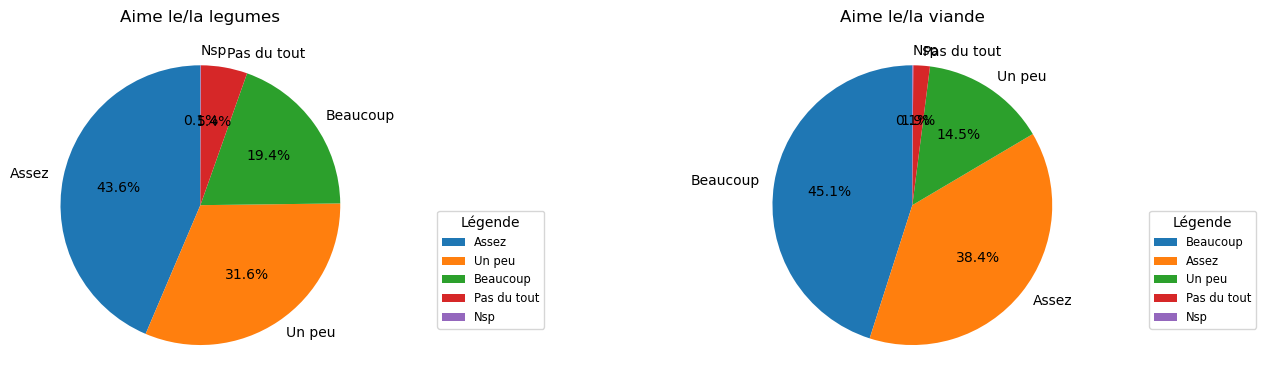

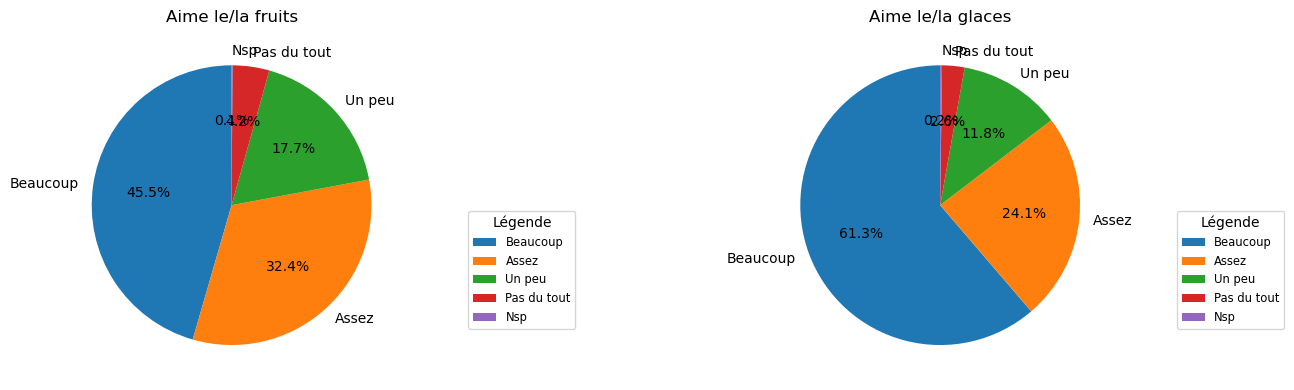

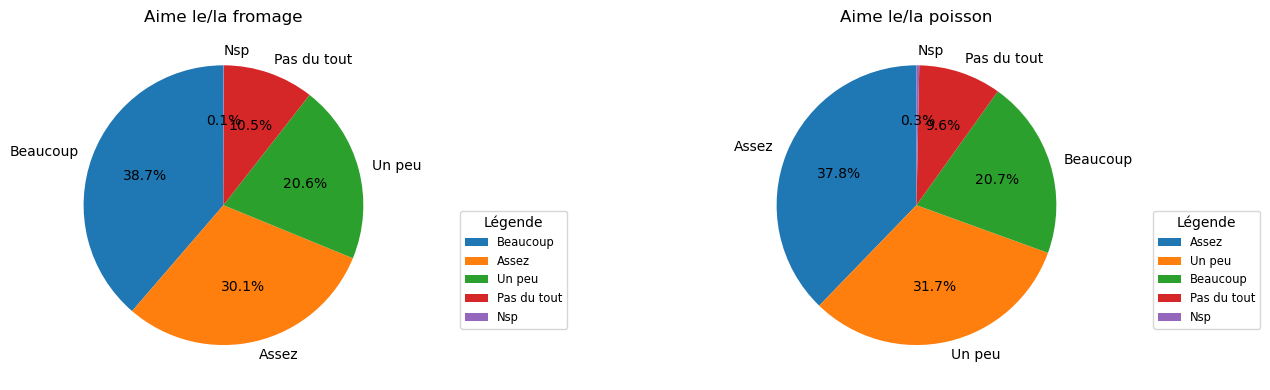

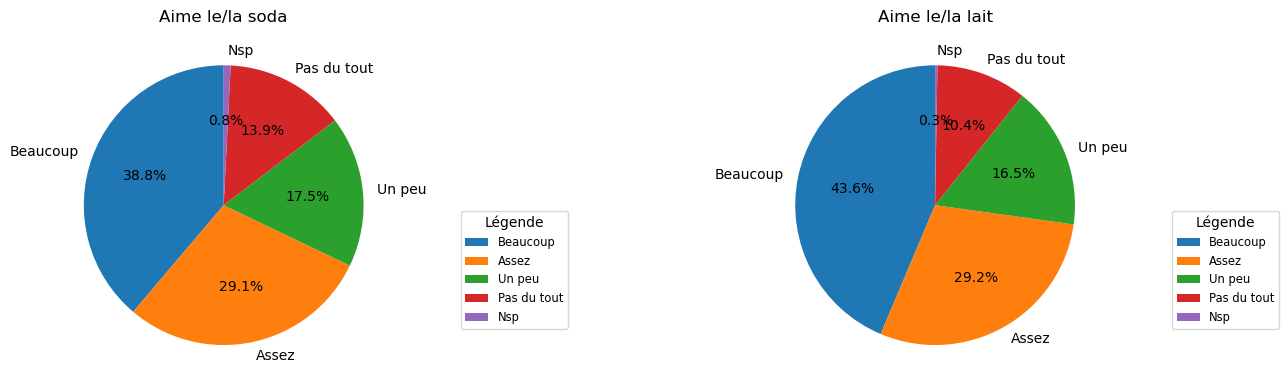

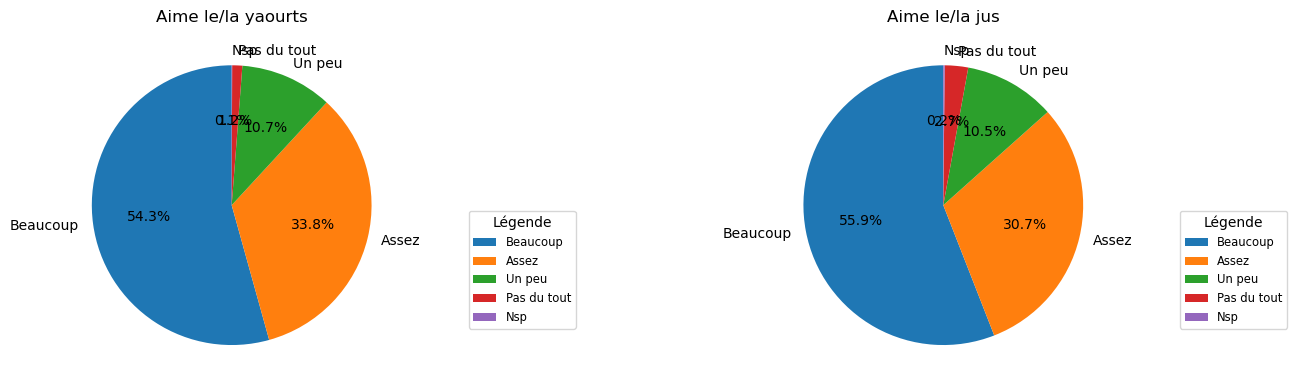

In [18]:
# Mapping des preferences 
mapping_pref = {1: 'Beaucoup', 2: 'Assez', 3: 'Un peu', 4: 'Pas du tout', 5: "Nsp"}

aime_columns = [col for col in habitudes_ali.columns if col.startswith('aime')]

# Definition de l'affichage 
nb_rows = 5
nb_cols = 2

# Nombre de figures 
num_figures = len(aime_columns) // nb_cols + (len(aime_columns) % nb_cols > 0)

# Iteration sur les figures 
for fig_num in range(num_figures):
    # Calculer colonnes 
    start_col = fig_num * nb_cols
    end_col = min((fig_num + 1) * nb_cols, len(aime_columns))

    # Subplots pour chaque figure 
    fig, axs = plt.subplots(1, end_col - start_col, figsize=(15, 4))

    # On itere sur les colonnes "aime"
    for i, col_num in enumerate(range(start_col, end_col)):
        col = aime_columns[col_num]

        # Mapping des preferences
        habitudes_ali[col] = habitudes_ali[col].map(mapping_pref)

        # Plot diagrammes
        count_by_format = habitudes_ali[col].value_counts()
        axs[i].pie(count_by_format, labels=count_by_format.index, autopct='%1.1f%%', startangle=90)
        axs[i].set_title(f"Aime le/la {col.split('_')[1]}")
        axs[i].legend(title="Légende", loc='upper right', bbox_to_anchor=(1.5, 0.5),fontsize='small')
    plt.tight_layout()
    plt.show()


Ce sont principalement ces statistiques qui nous sont utiles. Faute de temps nous n'avons pas pu les utiliser mais nous voudrions les prendre en compte lors de la proposition des recettes. La personne pourrait rentrer ses préférences alimentaires et l'algorithme lui proposerait des recettes en tenant compte de ce qu'il aime ou pas en filtrant les ingrédients. 

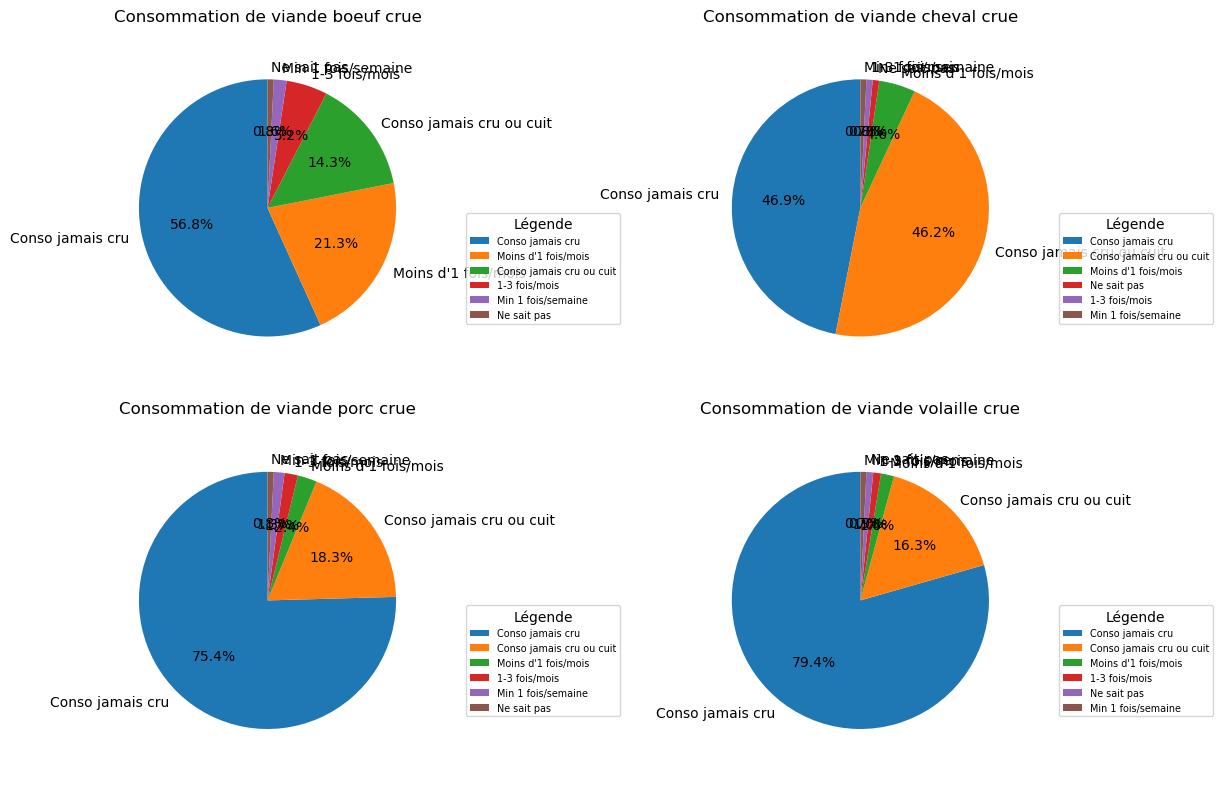

In [19]:
mapping_freq = { 1: 'Min 1 fois/semaine',2: '1-3 fois/mois',3: "Moins d'1 fois/mois",4: "Conso jamais cru",
    5: "Conso jamais cru ou cuit",6: "Ne sait pas "}

# Récupération des colonnes qui finissent par 'crue'
crue_columns = [col for col in habitudes_ali.columns if col.endswith('crue')]

# Calcul du nombre de lignes et colonnes 
num_rows = len(crue_columns) // 2 + (len(crue_columns) % 2 > 0)
num_cols = 2

# Creation de l'afichage
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))

axs_flat = axs.flatten()

# Iteration sur les colonnes concernées
for i, col in enumerate(crue_columns):
    # Utilisation du mapping 
    habitudes_ali[col] = habitudes_ali[col].map(mapping_freq)

    # Affichage des diagrammes
    count_by_format = habitudes_ali[col].value_counts()
    axs_flat[i].pie(count_by_format, labels=count_by_format.index, autopct='%1.1f%%', startangle=90, radius=0.9)  # Adjust parameters as needed
    axs_flat[i].set_title("Consommation de " + ' '.join(col.split('_')[1:]))
    axs_flat[i].legend(title="Légende", loc='upper right', bbox_to_anchor=(1.5, 0.5), fontsize='x-small')  # Adjust parameters as needed

plt.tight_layout()
plt.show()

# **3. Apports nutritionnels individuels journaliers estimés**

Cette table fournit les apports nutritionnels individuels journaliers estimés à partir des consommées observées sur 2 ou 3 jours de rappels de 24 heures pour les 4 114
individus de la Pop3, ainsi que la contribution à l’Apport Energétique Sans Alcool (AESA) pour les macronutriments et les apports pour 100 kcal pour les vitamines et
minéraux. 

## 3.1. Statistiques générales

In [20]:
apports = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/e7f48716-368f-48e1-a7c3-ea0638b0d6a7', sep = ';')
apports.head()

,POPULATION,NOIND,nutriment1,nutriment2,nutriment3,nutriment4,nutriment5,nutriment6,nutriment7,nutriment8,...,contrib45,contrib46,contrib47,contrib48,contrib49,contrib50,contrib51,contrib52,contrib53,contrib54
0,Pop3,110100101,2077.7625,2077.2795,83.054970,287.46045,145.453580,118.051110,0.272250,16.439404,...,0.074628,0.946185,0.345410,0.110520,16.502401,0.215986,8.642483,0.106113,0.258121,1.267153
1,Pop3,110100701,1123.7395,1122.6108,42.008881,141.19160,87.729454,40.941555,1.554727,21.721514,...,0.145274,1.462126,0.317232,0.098729,30.148006,0.119924,24.783506,0.252590,0.718946,0.070505
2,Pop3,110100801,2544.5754,2543.0146,87.255280,292.85364,148.375690,123.386040,0.837265,20.448515,...,0.050513,0.944199,0.214649,0.066984,11.707060,0.131240,6.312596,0.114005,0.332603,1.175436
3,Pop3,110101201,2154.6367,1738.7144,64.621910,176.34831,108.290740,52.579441,0.252013,14.028072,...,0.230425,1.569673,0.578777,0.112707,14.442437,0.533786,10.153035,0.224728,1.051633,0.520615
4,Pop3,110101401,1229.2993,1230.0304,44.161503,134.01630,52.806332,67.524727,0.441230,12.723254,...,0.124503,0.932228,0.360054,0.078900,15.277953,0.157646,2.613579,0.183976,0.467196,1.011166


Voici une petite légende des nutriments utiles dans notre projet :

- Nutriment 1 : Apport énergétique total 

- Nutriment 2 : Apport énergétique total sans alcool 

- Nutriment 3 : Protéines 

- Nutriment 4 : Glucides 

- Nutriment 10 : Lipides 

In [21]:
# On se concentre sur les macronutriments et les apports énergétiques
map_macro = {'nutriment3':'protéines', 'nutriment4':'glucides', "nutriment10":"lipides"} 
map_cal = {'nutriment1':'Apport énergétique total', 'nutriment2':'Apport énergétique total sans alcool'} 
apports.rename(map_macro, axis= 1, inplace = True)
apports.rename(map_cal, axis= 1, inplace = True)

In [22]:
stat_des = pd.DataFrame(apports[['protéines', 'glucides', 'lipides', 'Apport énergétique total', 'Apport énergétique total sans alcool']].describe())
stat_des

,protéines,glucides,lipides,Apport énergétique total,Apport énergétique total sans alcool
count,4114.000000,4114.000000,4114.000000,4114.000000,4114.000000
mean,73.847446,225.380057,70.162491,1911.877742,1873.579863
std,27.099156,85.658972,28.208624,672.881615,645.313336
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56.147850,165.833722,51.479381,1461.342725,1441.838300
50%,70.314324,216.780700,66.664185,1833.292950,1808.675100
75%,87.931719,271.839923,84.796692,2275.144225,2223.945275
max,228.019700,676.624940,292.767330,5582.388200,5581.120600


L'apport énergétique total avec et sans alcool est quasiment le même, ce qui nous permettra de considérer des besoins caloriques sans alcool dans notre projet par exemple. 

L'apport énergétique total moyen est d'ailleurs de 1911 cal par jour par personne. Selon les recommandations de l'OMS, les besoins caloriques moyens sont (selon les mêmes niveaux d'activité que ceux définis précédemment): 

- Sédentaire : 1800 à 2200 calories par jour

- Modérément actif : 2000 à 2400 calories par jour 

- Actif : 2200 à 2800 calories par jour 

- Très actif : 2400 à 3000 calories par jour 

Les statistiques précédentes prennent en compte les enfants, qui ont un besoin calorique plus faible. Si nous regardons le 3e quartile, nous observons un apport calorique total moyen de 2275, ce qui semble coller à une catégorie entre modérément actif et actif. Nous pouvons donc nous fier aux recommandations de l'OMS qui semblent être en conformité avec la distribution de la population. 


# **TRAITEMENT DE LA BASE DE DONNEES ALIMENTAIRES**

# **1. Récupération des données ingrédients**

Pour récupérer la liste des ingrédients disponibles dans la grande distribution, nous avons trouvé deux bases de données principales : l'OpenFoodFacts et Ciqual. La base de données d'OpenFoodFacts était cependant trop conséquente, donc nous avons choisi de nous concentrer sur la base Ciqual, plus petite. 

In [23]:
!pip install xlrd
!pip install unidecode
!pip install rapidfuzz
!pip install wordcloud
!pip install nltk

In [24]:
import pandas as pd 
import matplotlib.pyplot as plt
import rapidfuzz
import time
from wordcloud import WordCloud
from unidecode import unidecode
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re # for regular expressions 
from re import sub

In [25]:
# Lien du fichier et affichage 

data_ciqual = pd.read_excel("https://ciqual.anses.fr/cms/sites/default/files/inline-files/Table%20Ciqual%202020_FR_2020%2007%2007.xls") 
data_ciqual.head()

,alim_grp_code,alim_ssgrp_code,alim_ssssgrp_code,alim_grp_nom_fr,alim_ssgrp_nom_fr,alim_ssssgrp_nom_fr,alim_code,alim_nom_fr,alim_nom_sci,"Energie, Règlement UE N° 1169/2011 (kJ/100 g)",...,Vitamine K1 (µg/100 g),Vitamine K2 (µg/100 g),Vitamine C (mg/100 g),Vitamine B1 ou Thiamine (mg/100 g),Vitamine B2 ou Riboflavine (mg/100 g),Vitamine B3 ou PP ou Niacine (mg/100 g),Vitamine B5 ou Acide pantothénique (mg/100 g),Vitamine B6 (mg/100 g),Vitamine B9 ou Folates totaux (µg/100 g),Vitamine B12 (µg/100 g)
0,0,0,0,NaN,NaN,NaN,24999,Dessert (aliment moyen),NaN,NaN,...,NaN,NaN,"1,37","0,084","0,15","0,61","0,4","0,056","30,8","0,21"
1,1,101,0,entrées et plats composés,salades composées et crudités,-,25601,"Salade de thon et légumes, appertisée",NaN,-,...,-,-,"2,75","< 0,04","0,053","4,45","< 0,16","0,29",31,"1,45"
2,1,101,0,entrées et plats composés,salades composées et crudités,-,25602,"Salade composée avec viande ou poisson, appert...",NaN,-,...,"9,75",-,-,"0,032","0,022","4,13","0,2","0,12","11,1","1,23"
3,1,101,0,entrées et plats composés,salades composées et crudités,-,25605,"Champignons à la grecque, appertisés",NaN,-,...,-,-,"6,67","0,056","0,21","1,84","0,88","0,088","19,6","0,018"
4,1,101,0,entrées et plats composés,salades composées et crudités,-,25606,"Salade de pommes de terre, fait maison",NaN,-,...,-,-,10,"0,077","0,06","0,89","0,53","0,14",7,0


On décide de ne garder que les colonnes contenant le nom de l'aliment, son apport énérgétique, ainsi que certains substrats énergétiques courants (Glucides, Protéines,...). 

In [26]:
data_ciqual = data_ciqual[['alim_grp_nom_fr','alim_nom_fr','Energie, Règlement UE N° 1169/2011 (kJ/100 g)',
       'Energie, Règlement UE N° 1169/2011 (kcal/100 g)',
       'Protéines, N x 6.25 (g/100 g)', 'Glucides (g/100 g)',
       'Lipides (g/100 g)', 'Sucres (g/100 g)', 'Fructose (g/100 g)',
       'Glucose (g/100 g)', 'Lactose (g/100 g)','Saccharose (g/100 g)', 'Amidon (g/100 g)']]
#data_ciqual.head()

On renomme les colonnes pour plus de lisibilité.

In [27]:
new_names = {
    'alim_grp_nom_fr': 'Groupe',
    'alim_nom_fr': 'Nom aliment',
    'Energie, Règlement UE N° 1169/2011 (kJ/100 g)':'Energie kJ',
    'Energie, Règlement UE N° 1169/2011 (kcal/100 g)': 'Energie kcal',
    'Protéines, N x 6.25 (g/100 g)': 'Protéines',
    'Glucides (g/100 g)': 'Glucides',
    'Lipides (g/100 g)' : 'Lipides',
    'Sucres (g/100 g)'  : 'Sucres',
    'Fructose (g/100 g)': 'Fructose',
    'Glucose (g/100 g)' : 'Glucose',
    'Lactose (g/100 g)' : 'Lactose',
    'Saccharose (g/100 g)': 'Saccharose',
    'Amidon (g/100 g)'  : 'Amidon'
}

data_ciqual.rename(columns=new_names, inplace=True)

In [28]:
data_ciqual["Groupe"].unique()

array([nan, 'entrées et plats composés',
       'fruits, légumes, légumineuses et oléagineux',
       'produits céréaliers', 'viandes, œufs, poissons et assimilés',
       'produits laitiers et assimilés', 'eaux et autres boissons',
       'produits sucrés', 'glaces et sorbets', 'matières grasses',
       'aides culinaires et ingrédients divers', 'aliments infantiles'],
      dtype=object)

Nous voulons nous concentrer sur les aliments non transformés étant donné que l'on veut élaborer une recette nous-mêmes. Nous éliminons également les boissons et aliments infantiles. Nous garons les 'produits sucrés', bien qu'ils contiennent de nombreux produits transformés, car ils contiennent également des produits tels que 'spéculoos', qui peuvent être utiles dans les recettes. 

In [29]:
#Suppression de certains groupes alimentaires et des valeurs de groupe Na

mask = data_ciqual['Groupe'].isin(['entrées et plats composés', 'eaux et autres boissons', 'aliments infantiles'])
data_ciqual = data_ciqual.drop(data_ciqual[mask].index)
data_ciqual = data_ciqual.dropna(subset=['Groupe'])
data_ciqual.head()

,Groupe,Nom aliment,Energie kJ,Energie kcal,Protéines,Glucides,Lipides,Sucres,Fructose,Glucose,Lactose,Saccharose,Amidon
338,"fruits, légumes, légumineuses et oléagineux","Avocat, pulpe, cru",843,205,"1,56","0,83","20,6","0,4","0,16","0,16","< 0,2","< 0,2","< 0,35"
339,"fruits, légumes, légumineuses et oléagineux","Bette ou blette, crue","68,3","16,4",1,"1,63","< 0,5","1,2","0,5","0,7","< 0,2","< 0,2","< 0,35"
340,"fruits, légumes, légumineuses et oléagineux","Carotte, crue",169,"40,2","0,63","7,59","< 0,5",6,"0,9","1,1","< 0,2",4,"0,4"
341,"fruits, légumes, légumineuses et oléagineux","Champignon, tout type, cru","91,2","21,7","2,37","1,88","0,23","1,43","0,17","0,82",0,"< 0,1",0
342,"fruits, légumes, légumineuses et oléagineux","Salade ou chicorée frisée, crue",-,-,"1,48","2,4","0,25","0,7",-,-,-,-,-


Afin de pouvoir exploiter les données sur les apports énergétiques, nous regardons les proportions de NaN dans les différentes colonnes relatives aux apports. 

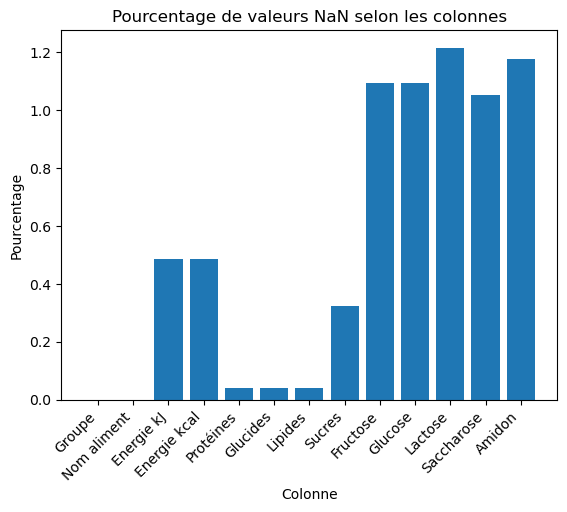

In [30]:
# Calcul des données manquantes selon les différentes colonnes

n = len(data_ciqual)
percentages = []
for col in (list(data_ciqual.columns)):
    percentages.append(((data_ciqual[col].isna()).sum()/n)*100)
plt.bar(data_ciqual.columns, percentages)
plt.xlabel('Colonne')
plt.ylabel('Pourcentage')
plt.xticks(rotation=45, ha='right')
plt.title('Pourcentage de valeurs NaN selon les colonnes')
plt.show()

Les valeurs principales qui nous intéressent sont dans un premier temps le nom des aliments étant donné que l'on veut un matching avec les noms d'aliments présents dans les recettes sur Marmiton. Dans un second temps, si nous voulons traiter l'apport énergétique nous nous intéresserons également à ces données. 
Les résultats sont donc très satisfaisants car il n'y a aucun nom d'aliment manquant et les apports sont manquants à hauteur de seulement 1%.

Nous aurons par la suite besoin des données caloriques afin de calculer l'apport des recettes. Pour cela, nous convertissons les colonnes concernées en flottants. 

In [31]:
cols_float = ['Energie kJ','Energie kcal','Protéines','Glucides','Lipides',
              'Sucres','Fructose','Glucose','Lactose','Saccharose','Amidon']

for col in cols_float:
    data_ciqual[col] = pd.to_numeric(data_ciqual[col].str.replace(',', '.'), errors='coerce')
    data_ciqual[col].fillna(value=0, inplace=True)

# **2. Simplification des ingrédients et normalisation (NLP)**

**Approche utilisée:**

Afin de relier les ingrédients des recettes aux ingrédients de la base, nous devons nous assurer que les noms des ingrédients sont clairs et similaires à ceux des recettes. Nous avons donc cherché à "nettoyer" les noms des aliments de notre base de données au maximum. 

Dans un premier temps, nous avons traité les alimens de la base Ciqual à l'aide d'une fonction *cleaning*. Cette fonction utilise des stopwords, met les mots en majuscules, retire les caractères non ASCII (les accents en français par exemple) et retire les caractères qui ne sont pas des lettres grâce à l'utilisation d'expressions régulières.

**Limites :** 

Nous avons remarqué que beaucoup d'aliments avaient des noms similaires dans la base Ciqual (il existe par exemple une dizaine de types de laits différents, et même pour un lait demi-écremé simple, il en existe deux). Il existe également pour un même aliment, sa version cuite et crue, ce qui pourrait être intéressant de traiter dans notre cas. En effet, si l'on fait une recette de carottes crues, l'apport calorique est deux fois moins important que lorsque les carottes sont cuites.

Une piste pourrait être d'élaborer un dictionnaire qui, pour un nom d'aliment classique, associe l'ensemble des noms "farfelus" qui lui sont donnés dans la base. 

Afin d'identifier les mots superflus ou farfelus dans les noms d'aliments, on affiche dans un premier temps un nuage de mots :  

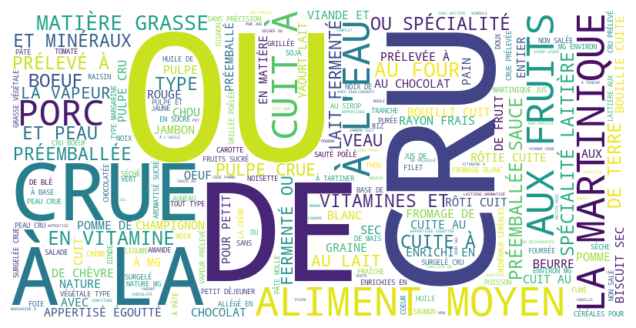

In [32]:
concat_aliments = ' '.join(data_ciqual["Nom aliment"].apply(lambda row : row.upper()))
cloud = WordCloud(width=800, height=400, background_color='white').generate(concat_aliments)
plt.figure(figsize=(8, 4))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

On réalise qu'il y a pour le moment beaucoup de bruit dans les noms d'aliments, tel que **cru** ou **aliment**. On définit donc une liste de stopwords (qui ne doit pas être trop grande néanmoins car on veut pouvoir apparier les aliments avec ceux des recettes).

In [33]:
# On applique la fonction de nettoyage des chaînes de caractères 

data_ciqual["Nom clean"] = data_ciqual["Nom aliment"].apply(cleaning)
data_ciqual.head(5)

,Groupe,Nom aliment,Energie kJ,Energie kcal,Protéines,Glucides,Lipides,Sucres,Fructose,Glucose,Lactose,Saccharose,Amidon,Nom clean
338,"fruits, légumes, légumineuses et oléagineux","Avocat, pulpe, cru",843.0,205.0,1.56,0.83,20.60,0.40,0.16,0.16,0.0,0.0,0.0,AVOCAT PULPE
339,"fruits, légumes, légumineuses et oléagineux","Bette ou blette, crue",68.3,16.4,1.00,1.63,0.00,1.20,0.50,0.70,0.0,0.0,0.0,BETTE BLETTE
340,"fruits, légumes, légumineuses et oléagineux","Carotte, crue",169.0,40.2,0.63,7.59,0.00,6.00,0.90,1.10,0.0,4.0,0.4,CAROTTE
341,"fruits, légumes, légumineuses et oléagineux","Champignon, tout type, cru",91.2,21.7,2.37,1.88,0.23,1.43,0.17,0.82,0.0,0.0,0.0,CHAMPIGNON
342,"fruits, légumes, légumineuses et oléagineux","Salade ou chicorée frisée, crue",0.0,0.0,1.48,2.40,0.25,0.70,0.00,0.00,0.0,0.0,0.0,SALADE CHICOREE FRISEE


On affiche le nouveau nuage de mots, plus clair cette fois ! 

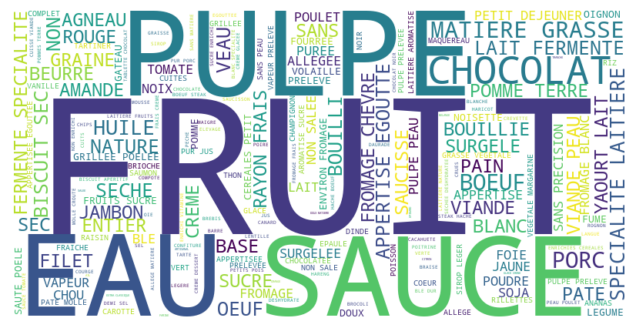

In [34]:
concat_aliments = ' '.join(data_ciqual["Nom clean"])
cloud = WordCloud(width=800, height=400, background_color='white').generate(concat_aliments)
plt.figure(figsize=(8, 4))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# **3. Matching avec les ingrédients de la recette**

**Approche utilisée:**

Bien que nous ayons déjà nettoyé les noms des aliments de notre base de données, les noms des aliments de notre base peuvent différer de ceux utilisés dans une recette.
 Nous avons donc tenté dans un premier temps de nettoyer au maximum les intitulés des aliments de notre base à l'aide d'une fonction *cleaning*. Cette fonction utilise des stopwords, met les mots en majuscules, retire les caractères non ASCII (les accents en français par exemple) et retire les caractères qui ne sont pas des lettres. 

 Dans un second temps, notre objectif était de mettre au point une fonction de distance qui permettrait d'associer, à chaque aliment d'une recette, un aliment de notre base, qui serait le plus proche possible. 

**Difficultés rencontrées :**

Pour l'élaboration de la distance entre les aliments, notre première approche a consisté en une évaluation des différentes mesures de distances *classiques* sur des chaînes de caractères : distance de Levenshtein, Similarity ratio, Cosine similarity. Cependant, ces mesures ne nous donnaient pas des résultats satisfaisants car elles étaient trop simples. 

Nous avons donc choisi d'utiliser la bibliothèque de traitement automatique de pyhon : Spacy. Pour utiliser cette bibliothèque, il s'agit de vectoriser l'ensemble des ingrédients de notre base de données et ensuite de comparer cette vectorisation à l'aliment de la recette que l'on cherche à faire correspondre. 

**Limites :**

Malgré ces précautions, certains aliments demeurent difficilent à apparier (pour SEL par exemple, notre fonction ne trouve aucune correspondance). Une approche possible pour corriger cela serait de nettoyer plus profondément la base de données Ciqual, dans laquelle les noms des aliments sont parfois très farfelus. Nous pourrions par ailleurs élargir la liste des stopwords que nous avons définie, mais cela relève du cas par cas et ne constituerait donc pas une bonne généralisation. 



On crée ensuite une fonction qui associe à chaque ingrédient de la recette, les ingrédients présents dans la base de données et leur apport calorique.

In [35]:
nlp = spacy.load('fr_core_news_sm') 

vectors = np.array([nlp(aliment).vector for aliment in data_ciqual['Nom clean'] if nlp(aliment).vector.any()])     #Vectorisation des aliments de la base Ciqual par le modèle fr_core_news_sm#

find_match("OEUF",data_ciqual,vectors,0.8)


'OEUF'

La vectorisation de la base de données ciqual prend environ 10 secondes à s'exécuter car c'est une lourde opération, mais elle nous permet d'aller plus plus vite par la suite. 

Ici, de manière assez satisfaisante, on voit que si l'on cherche l'ingrédient "le plus proche" oeuf dans la base de données Ciqual, on trouve bien oeuf !  

# **WEBSCRAPING DE MARMITON**

**Entrée :** 

En entrée notre scraper prend un ingrédient que l'utilisateur possède chez lui et avec lequel il veut faire une recette. 

**Sortie :** 

La sortie de notre scraper est une liste d'une dizaine de recettes (on suppose que ce choix suffit à notre gourmand d'utilisateur) utilisant cet ingrédient. Les recettes sont stockées sous la forme d'un dictionnaire contenant le nom de la recette, la liste des ingrédients nécessaires ainsi que le lien de la page web de la recette. 

# **1. Installation de Selenium**
Pour mimer le comportement d'un utilisateur qui navigue sur une page web (et pas sur une page statique), on utilise Selenium.
Cela nécessite l'installation de quelques dépendances avant l'installation de Selenium lui-même.

## 1.1. On installe les dépendances

In [2]:
!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb -O /tmp/chrome.deb
!sudo apt-get update
!sudo -E apt-get install -y /tmp/chrome.deb
!pip install chromedriver-autoinstaller selenium

import chromedriver_autoinstaller
chromedriver_autoinstaller.install()

--2023-12-30 11:15:54--  https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
Resolving dl.google.com (dl.google.com)... 64.233.166.91, 64.233.166.93, 64.233.166.136, ...
Connecting to dl.google.com (dl.google.com)|64.233.166.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104953176 (100M) [application/x-debian-package]
Saving to: ‘/tmp/chrome.deb’

/tmp/chrome.deb     100%[===================>] 100.09M  70.4MB/s    in 1.4s    

2023-12-30 11:15:55 (70.4 MB/s) - ‘/tmp/chrome.deb’ saved [104953176/104953176]

Get:1 http://archive.ubuntu.com/ubuntu jammy InRelease [270 kB]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security/multiverse amd64 Packages [44.0 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security/restri

'/opt/mamba/lib/python3.10/site-packages/chromedriver_autoinstaller/120/chromedriver'

## 1.2. On installe Selenium

In [3]:
!pip install webdriver-manager

import selenium
from webdriver_manager.chrome import ChromeDriverManager

path_to_web_driver = ChromeDriverManager().install()

# **2. Lancement de marmiton**

## 2.1. On initialise le navigateur
Pour mimer le comportement d'un utilisateur, on doit initialiser le navigateur, notammment pour pouvoir mimer un temps de latence (un utilisateur n'agit pas de manière absolument instantanée) et le fait d'actionner les touches du clavier.

In [4]:
import time

from selenium import webdriver
from selenium.webdriver.common.keys import Keys

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

## 2.2. On lance le navigateur
On exécute le navigateur comme le ferait un utilisateur.

In [5]:
from selenium.webdriver.chrome.service import Service
service = Service(executable_path=path_to_web_driver)

browser = webdriver.Chrome(service=service,
                           options=chrome_options)

## 2.3. On se rend sur marmiton
La commande "get" nous permet de réaliser cette action très facilement. 

In [6]:
browser.get('https://www.marmiton.org')
print('Arrivée sur marmiton')

Arrivée sur marmiton


# **3. Gestion des cookies**
Lorsqu'on arrive sur le site de Marmiton, un popup s'ouvre qui demande à ce que l'on accepte les cookies.\
Pour que cette acceptation se fasse automatiquement, on recherche dans le code source le bouton "accepter les cookies" et on mime le comportement d'un utilisateur qui actionnerait cette commande.

In [7]:
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException, WebDriverException

try : 
    popup = browser.find_element(By.ID, "didomi-notice-agree-button")
    popup.click()
    time.sleep(2)
except NoSuchElementException:
    pass

print("Entrée sur marmiton réussie \n")

Entrée sur marmiton réussie 



# **4. Recherche de recettes pour un ingrédient donné**

## 4.1. On recherche l'ingrédient choisi dans la barre de recherche du site
a) On se place dans la barre de recherche\
b) On mime le comportement d'un utilisateur qui utiliserait le clavier pour formuler sa requête (en terminant par actionner la touche "ENTREE"/"RETURN")

In [8]:
search = browser.find_element("name", "aqt")
print(search)

search.send_keys("poireau")
search.send_keys(Keys.RETURN)

time.sleep(1)

print("recettes trouvées")

<selenium.webdriver.remote.webelement.WebElement (session="d4804c48a445972757ffd9cd65506bd9", element="83083BAC13F21ABB5A37342B1585BEC8_element_29")>
recettes trouvées


## 4.2. On résupère l'URL de la page présentant les résultats de la recherche
Cela se fait très facilement à partir du code suivant.

In [9]:
url = browser.current_url
print(url)

https://www.marmiton.org/recettes/recherche.aspx?aqt=poireau


## 4.3. On récupère les url des pages correspondant aux différentes recettes trouvées

### 4.3.1 Grâce au xpahth, on récupère les url des recettes trouvées
a) On importe le package urllib3\
b) On installe la bibliothèque lxml qui est une bibliothèque de traitement prenant notamment en charge xpath\
c) On récupère le xpath de la page de résultats obtenue après la recherche précédente\
d) Cela nous permet, pour chacun des noeuds dépendant de ce xpath, de récupérer l'url correspondante\
e) On affiche les url des noeuds qui nous intéressent, c'est-à-dire de ceux menant à des recettes (et dont l'url commence donc par "/recettes/recette").

In [10]:
import urllib3
http = urllib3.PoolManager()
r= http.request('GET', url)
# si on veut : print(r.data)

!pip install lxml 
from lxml import html

data_string = r.data.decode('utf-8', errors = 'ignore')
tree = html.fromstring(data_string)

links = tree.xpath('//a')
for link in links:
    l = link.get('href')
    if l.startswith('/recettes/recette'):
        print(l)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 31.9 MB/s eta 0:00:0000:0100:01
/recettes/recettes-incontournables.aspx
/recettes/recette_tarte-aux-poireaux-et-aux-lardons_12850.aspx
/recettes/recette_quiche-poireaux-chevre-lardons_22275.aspx
/recettes/recette_tagliatelles-a-la-creme-de-poireaux_20838.aspx
/recettes/recette_quiche-au-poireau-et-saumon-fume_16938.aspx
/recettes/recette_fondue-de-poireaux_20348.aspx
/recettes/recette_risotto-aux-poireaux_19753.aspx
/recettes/recette_pave-de-saumon-sur-son-lit-de-poireaux_25136.aspx
/recettes/recette_potage-veloute-poireaux-pommes-de-terre_18971.aspx
/recettes/recette_brick-au-thon-et-au-poireau_29421.aspx
/recettes/recette_papillote-de-saumon-super-fondant-aux-poireaux_16801.aspx
/recettes/recette_tourte-poireaux-jambon-et-chevre_24497.aspx
/recettes/recette_tarte-au-chevre-et-aux-poireaux_18100.aspx


### 4.3.2. On crée une liste avec les url correspondant aux recettes trouvées
Pour cela, on commence par créer une liste vide. Pour chaque noeud du xpath trouvé précédemment, on obtient l'url grâce à la méthode "get('href')". On ne conserve que les noeuds menant à des recettes, c'est-à-dire ceux dont l'url commence par "/recettes/recette". Enfin, pour que le navigateur puisse suivre ces url par la suite, il faut ajouter "https://www.marmiton.org".\
On obtient alors une liste d'url pertinentes et fonctionnelles. 

In [11]:
liste_url_recettes = []
for link in links:
    l = link.get('href')
    if l.startswith('/recettes/recette'):
        url_recette = 'https://www.marmiton.org'+l
        liste_url_recettes.append(url_recette)
print(liste_url_recettes)

['https://www.marmiton.org/recettes/recettes-incontournables.aspx', 'https://www.marmiton.org/recettes/recette_tarte-aux-poireaux-et-aux-lardons_12850.aspx', 'https://www.marmiton.org/recettes/recette_quiche-poireaux-chevre-lardons_22275.aspx', 'https://www.marmiton.org/recettes/recette_tagliatelles-a-la-creme-de-poireaux_20838.aspx', 'https://www.marmiton.org/recettes/recette_quiche-au-poireau-et-saumon-fume_16938.aspx', 'https://www.marmiton.org/recettes/recette_fondue-de-poireaux_20348.aspx', 'https://www.marmiton.org/recettes/recette_risotto-aux-poireaux_19753.aspx', 'https://www.marmiton.org/recettes/recette_pave-de-saumon-sur-son-lit-de-poireaux_25136.aspx', 'https://www.marmiton.org/recettes/recette_potage-veloute-poireaux-pommes-de-terre_18971.aspx', 'https://www.marmiton.org/recettes/recette_brick-au-thon-et-au-poireau_29421.aspx', 'https://www.marmiton.org/recettes/recette_papillote-de-saumon-super-fondant-aux-poireaux_16801.aspx', 'https://www.marmiton.org/recettes/recette_t

## 4.4. Visualisation
Cette liste d'url nous permet de retrouver les différentes recettes en suivant le lien et également de trouver leurs noms, qui sont à chaque fois contenus dans l'url.

### 4.4.1 Pour chaque recette, on peut suivre l'url

In [12]:
import requests

for recette in liste_url_recettes:
    print(requests.get(recette))

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


### 4.4.2. On peut afficher les titres des différentes recettes
En effet les url des recettes sont constuits selon un format semblable, ce qui fait que le nom de la recette est toujours un segment de l'url situé à la même position. Il suffit donc de ne choisir que certains caractères de l'url.

In [13]:
for recette in liste_url_recettes:
    print(recette[42:-11])

-incontour
tarte-aux-poireaux-et-aux-lardons
quiche-poireaux-chevre-lardons
tagliatelles-a-la-creme-de-poireaux
quiche-au-poireau-et-saumon-fume
fondue-de-poireaux
risotto-aux-poireaux
pave-de-saumon-sur-son-lit-de-poireaux
potage-veloute-poireaux-pommes-de-terre
brick-au-thon-et-au-poireau
papillote-de-saumon-super-fondant-aux-poireaux
tourte-poireaux-jambon-et-chevre
tarte-au-chevre-et-aux-poireaux


## 4.5. On crée une liste de recettes
Chaque recette est un dictionnaire comportant le nom de la recette, la liste des ingrédients et l'url associé.\
a) On commence par créer une liste vide\
b) Pour chaque recette (à partir de l'url trouvé plus haut), on définit le nom de la recette\
c) Pour chaque recette, grâce à une recherche dans le code source, on trouve la liste des ingrédients\
d) Pour chaque recette, on crée un dictionnaire avec le nom de la recette, la liste des ingrédients et l'url renvoyant à la page marmiton correspondante\
e) Enfin, on enlève la première "recette", qui correspond, non pas à une véritable recette mais à une page de "recettes incontournables" qui ne nous intéressent pas ici

In [14]:
liste_recettes = []

for url_recette in liste_url_recettes:
    
    titre = url_recette[42:-11]
    
    browser.get(url_recette)
    liste_url_ingredients = browser.find_elements(By.CLASS_NAME, 'card-ingredient')
    liste_ingredients = []
    for x in liste_url_ingredients:
        liste_ingredients.append(x.text)

    recette = {'Recette':titre, 'Liste des ingrédients':liste_ingredients, 'Lien vers la recette':url_recette}
    
    liste_recettes.append(recette)
    
print(liste_recettes[1:])

[{'Recette': 'tarte-aux-poireaux-et-aux-lardons', 'Liste des ingrédients': ['sel', 'poivre', '25 cl\nde crème fraîche', '100 g\nde fromage râpé', '400 g\nde lardons', '3\npoireaux', '140 g\nde beurre', '250 g\nde farine', "2 cuillères à soupe\nd' eau", '3\noeufs'], 'Lien vers la recette': 'https://www.marmiton.org/recettes/recette_tarte-aux-poireaux-et-aux-lardons_12850.aspx'}, {'Recette': 'quiche-poireaux-chevre-lardons', 'Liste des ingrédients': ['sel', 'poivre', '20 cl\nde crème fraîche', '3\npoireaux', '250 g\nde pâte brisée (ou une pâte toute prête)', '100 g\nde lardons fumés', '1\nfromage de chèvre (cottin, bûche...selon les goûts)', '3\noeufs', '10 cl\nde lait'], 'Lien vers la recette': 'https://www.marmiton.org/recettes/recette_quiche-poireaux-chevre-lardons_22275.aspx'}, {'Recette': 'tagliatelles-a-la-creme-de-poireaux', 'Liste des ingrédients': ['sel', 'poivre', 'beurre', '1 petit pot\nde crème fraîche', '150 g\nde lardons', '2\npoireaux', '500 g\nde tagliatelles', 'Parmesan'

# **5. Fin du webscrapping : on quitte la recherche**
Le webscrapping est terminé, on peut donc quitter le navigateur.

In [15]:
browser.quit()

**Difficultés et limites du scraper :**

- Il nous a été assez difficile de mettre en place le scraper, de par l'installation des différentes dépendances, ou encore la gestion des cookies sur la page d'accueil. La gestion des cookies a été traitée par le fait de cliquer sur l'autorisation des cookies. 

- Nous aurions pu faire une recherche à partir de plusieurs ingrédients, ou via des rubriques spéciales du site marmiton (par exemple : recettes du moment ou recettes de fêtes) mais nous avons préféré nous restreindre à un ingrédient dans la barre de recherche principale. Cela nous permet de ne pas perdre de généralités car si nous rentrons trop d'ingrédients, peu de recettes risquent d'être réalisables.  

# **CONVERSION DE LA RECETTE** 

L'objectif de cette partie est d'obtenir l'apport calorique des recettes trouvées grâce au scraper afin que l'utilisateur puisse adapter ses choix alimentaires à ses besoins calorifiques.

In [17]:
vectors = np.array([nlp(aliment).vector for aliment in data_ciqual['Nom clean'] if nlp(aliment).vector.any()]) 

NameError: name 'data_ciqual' is not defined

On se sert de la liste de recettes obtenues à l'issue du scraping de marmiton : 

In [39]:
recettes = [{'Recette': 'tarte-aux-poireaux-et-aux-lardons', 'Liste des ingrédients': ['sel', 'poivre', '25 cl\nde crème fraîche', '100 g\nde fromage râpé', '400 g\nde lardons', '3\npoireaux', '140 g\nde beurre', '250 g\nde farine', "2 cuillères à soupe\nd' eau", '3\noeufs'], 'Lien vers la recette': 'https://www.marmiton.org/recettes/recette_tarte-aux-poireaux-et-aux-lardons_12850.aspx'}, {'Recette': 'quiche-poireaux-chevre-lardons', 'Liste des ingrédients': ['sel', 'poivre', '20 cl\nde crème fraîche', '3\npoireaux', '250 g\nde pâte brisée (ou une pâte toute prête)', '100 g\nde lardons fumés', '1\nfromage de chèvre (cottin, bûche...selon les goûts)', '3\noeufs', '10 cl\nde lait'], 'Lien vers la recette': 'https://www.marmiton.org/recettes/recette_quiche-poireaux-chevre-lardons_22275.aspx'}, {'Recette': 'tagliatelles-a-la-creme-de-poireaux', 'Liste des ingrédients': ['sel', 'poivre', 'beurre', '1 petit pot\nde crème fraîche', '150 g\nde lardons', '2\npoireaux', '500 g\nde tagliatelles', 'Parmesan'], 'Lien vers la recette': 'https://www.marmiton.org/recettes/recette_tagliatelles-a-la-creme-de-poireaux_20838.aspx'}, {'Recette': 'quiche-au-poireau-et-saumon-fume', 'Liste des ingrédients': ['muscade', 'sel', 'poivre', '4 cuillères à soupe\nde crème fraîche allégée', '50 g\nde gruyère râpé', '2\npoireaux', '1\npâte brisée', '4 tranches\nde saumon fumé', '2\noeufs', '6 cuillères à soupe\nde lait'], 'Lien vers la recette': 'https://www.marmiton.org/recettes/recette_quiche-au-poireau-et-saumon-fume_16938.aspx'}, {'Recette': 'fondue-de-poireaux', 'Liste des ingrédients': ['poivre du moulin', 'sel', '2 cuillères à soupe\nde crème fraîche', '1 cuillère à soupe\nde moutarde de Dijon', '30 g\nde beurre', '600 g\nde poireau', '2 cuillères à soupe\nde jus de citron'], 'Lien vers la recette': 'https://www.marmiton.org/recettes/recette_fondue-de-poireaux_20348.aspx'}, {'Recette': 'risotto-aux-poireaux', 'Liste des ingrédients': ['crème fraîche', 'beurre', '1\ncube de bouillon de légumes ou un Kub Or', '3\npoireaux de belle taille', '4 louches\nde riz pour risotto', '1\nvin blanc sec', 'parmesan râpé'], 'Lien vers la recette': 'https://www.marmiton.org/recettes/recette_risotto-aux-poireaux_19753.aspx'}, {'Recette': 'pave-de-saumon-sur-son-lit-de-poireaux', 'Liste des ingrédients': ['curry', 'huile', 'sel', 'poivre', '4\npoireaux', '4 pavés\nde saumon', '20 cl\nde crème fraîche épaisse'], 'Lien vers la recette': 'https://www.marmiton.org/recettes/recette_pave-de-saumon-sur-son-lit-de-poireaux_25136.aspx'}, {'Recette': 'potage-veloute-poireaux-pommes-de-terre', 'Liste des ingrédients': ['50 g\nde beurre', 'sel', 'poivre', 'crème fraîche', '2\npoireaux', '2\npommes de terre', '0.5 l\nde lait', "0.5 l\nd' eau", 'basilic ciselé'], 'Lien vers la recette': 'https://www.marmiton.org/recettes/recette_potage-veloute-poireaux-pommes-de-terre_18971.aspx'}, {'Recette': 'brick-au-thon-et-au-poireau', 'Liste des ingrédients': ['sel', 'poivre', '2 cuillères à soupe\nde crème fraîche', '1 cuillère à café\nde curry', '2\npoireaux "moyens"', '6 feuilles\nde brick', '250 g\nde thon en boîte', '1\noeuf'], 'Lien vers la recette': 'https://www.marmiton.org/recettes/recette_brick-au-thon-et-au-poireau_29421.aspx'}, {'Recette': 'papillote-de-saumon-super-fondant-aux-poireaux', 'Liste des ingrédients': ['sel', 'poivre', 'aneth', '2\noignons', '3\npoireaux', '1 filet\nde saumon par personne', 'crème'], 'Lien vers la recette': 'https://www.marmiton.org/recettes/recette_papillote-de-saumon-super-fondant-aux-poireaux_16801.aspx'}, {'Recette': 'tourte-poireaux-jambon-et-chevre', 'Liste des ingrédients': ['3\npoireaux', '1 rouleau\nde pâte feuilletée', '2\nchèvre frais', '100 g\nde dés de jambon', '25 cl\nde crème liquide', "2\njaunes d'oeuf"], 'Lien vers la recette': 'https://www.marmiton.org/recettes/recette_tourte-poireaux-jambon-et-chevre_24497.aspx'}, {'Recette': 'tarte-au-chevre-et-aux-poireaux', 'Liste des ingrédients': ['1 pincée\nde sel', '150 g\nde beurre', '300 g\nde farine', "2 cuillères à soupe\nd' épices orientale)", 'sel', 'poivre', 'emmental râpé', '2\npoireaux', '40 cl\nde crème fraîche épaisse', '4\noeufs', '1 verre\nde lait', '1\nbûche de chèvre (ou 150 gr de fromage de chèvre du même type)'], 'Lien vers la recette': 'https://www.marmiton.org/recettes/recette_tarte-au-chevre-et-aux-poireaux_18100.aspx'}]

La fonction conversion_recette permet d'obtenir, pour une recette donnée, la liste des ingrédients sous forme d'un dictionnaire avec le nom de chaque aliment et sa quantité. On montre ci-après le résultat pour l'une des recettes trouvées. 

In [136]:
test = {'Recette': 'tarte-au-chevre-et-aux-poireaux', 'Liste des ingrédients': ['1 pincée\nde sel', '150 g\nde beurre', '300 g\nde farine', "2 cuillères à soupe\nd' épices orientale)", 'sel', 'poivre', 'emmental râpé', '2\npoireaux', '40 cl\nde crème fraîche épaisse', '4\noeufs', '1 verre\nde lait', '1\nbûche de chèvre (ou 150 gr de fromage de chèvre du même type)'], 'Lien vers la recette': 'https://www.marmiton.org/recettes/recette_tarte-au-chevre-et-aux-poireaux_18100.aspx'}

In [139]:
conversion_recette(test) 

({'SEL': 1,
  'BEURRE': 150.0,
  'FARINE': 300.0,
  'EPICES ORIENTALE': 2.0,
  'POIVRE': 1,
  'EMMENTAL RAPE': 1,
  'POIREAUX': 2.0,
  'CREME FRAICHE EPAISSE': 400.0,
  'OEUFS': 4.0,
  'VERRE LAIT': 1.0,
  'BUCHE CHEVRE': 1.0},
 [])

In [137]:
calcul_calories(test,data_ciqual,vectors)

({'SEL': 3.78,
  'BEURRE': 0.0,
  'FARINE': 1143.0,
  'EPICES ORIENTALE': 1.9340000000000002,
  'POIVRE': 1.36,
  'EMMENTAL RAPE': 3.67,
  'POIREAUX': 0.0,
  'CREME FRAICHE EPAISSE': 528.0,
  'OEUFS': 15.24,
  'VERRE LAIT': 3.33,
  'BUCHE CHEVRE': 2.85},
 1703.1639999999998)

On calcule ensuite les apports caloriques de chaque recette, en espérant les comparer ensuite. 

In [138]:
calories = {}

for rec in recettes:
    nom  = rec['Recette']
    calories[nom] = calcul_calories(rec,data_ciqual,vectors)
print(calories)
    

{'tarte-aux-poireaux-et-aux-lardons': ({'SEL': 3.78, 'POIVRE': 1.36, 'CREME FRAICHE': 832.5, 'FROMAGE RAPE': 294.0, 'POIREAUX': 0.0, 'BEURRE': 0.0, 'FARINE': 952.5, 'EAU': 0.0, 'OEUFS': 11.43}, 2095.5699999999997), 'quiche-poireaux-chevre-lardons': ({'SEL': 3.78, 'POIVRE': 1.36, 'CREME FRAICHE': 666.0, 'POIREAUX': 0.0, 'PATE BRISEE': 840.0, 'FROMAGE CHEVRE': 2.74, 'OEUFS': 11.43, 'LAIT': 0.0}, 1525.31), 'tagliatelles-a-la-creme-de-poireaux': ({'SEL': 3.78, 'POIVRE': 1.36, 'BEURRE': 0.0, 'PETIT POT CREME FRAICHE': 0.0, 'POIREAUX': 0.0, 'PARMESAN': 4.06}, 9.2), 'quiche-au-poireau-et-saumon-fume': ({'MUSCADE': 3.38, 'SEL': 3.78, 'POIVRE': 1.36, 'CREME FRAICHE ALLEGEE': 0.0, 'GRUYERE RAPE': 133.0, 'POIREAUX': 0.0, 'PATE BRISEE': 3.36, 'TRANCHES SAUMON FUME': 14.56, 'OEUFS': 7.62, 'LAIT': 0.0}, 167.06000000000003), 'fondue-de-poireaux': ({'POIVRE MOULIN': 3.1, 'SEL': 3.78, 'CREME FRAICHE': 6.66, 'MOUTARDE DIJON': 0.0, 'BEURRE': 0.0, 'POIREAU': 193.8}, 207.34), 'risotto-aux-poireaux': ({'CRE

On affiche l'apport de chaque recette et on les classe par ordre croissant.

In [1]:
apports = {}
for rec in recettes:
    nom = rec['Recette']
    apports[nom] = sum(calories[rec].values())
plt.bar(apports.keys(),sorted(apports.values()))
plt.show()

NameError: name 'recettes' is not defined

**Limites du processus d'obtention des apports calorifiques**
On a utilisé ici des expressions régulières peu précises. Comme la liste des ingrédients n'est pas présentée sous un format complètement standardisé, il a été compliqué de séparer proprement le nom de l'aliment de la quantité associée.\
Par ailleurs, le calcul des calories n'est peut-être pas toujours tout à fait exact. En effet, la base ciquel précisait que les apports étaient un peu différents en fonction du type (marque par exemple) choisi pour chaque aliment. Elle présentait ainsi les données pour plus de 10 laits différents. On ne retrouve pas cette précision sur marmiton (où il n'y a par exemple que 2 ou 3 types de lait) donc les apports réels peuvent être un peu différents de ceux présentés ici. De la même manière, les proportions peuvent varier légèrement, par rapport à celles de la recette qui sont celles utilisées pour le calcul\
Malgré tout, le calcul remplit sa fonction informatve qui est de permettre aux utilisateurs d'avoir au moins une idée de l'apport de chaque recette. 